Setup the environment

In [2]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np

Load the data

In [3]:
data=pd.read_csv(r"C:\Users\India\OneDrive\Desktop\data_cleaned.csv")

Exploratory Data Analysis(EDA)

1. Basic structure

In [5]:
data.head(10)

,InvoiceNo,StockCode,Description,Quantity,Transaction Type,InvoiceDate,UnitPrice,Customer Type,CustomerID,Country,Total price
0,536365,85123A,WHITE HANGING HEART T-LIGHT HOLDER,6,Sale,2010-01-12,2.55,Registered,17850.0,United Kingdom,15.30
1,536365,71053,WHITE METAL LANTERN,6,Sale,2010-01-12,3.39,Registered,17850.0,United Kingdom,20.34
2,536365,84406B,CREAM CUPID HEARTS COAT HANGER,8,Sale,2010-01-12,2.75,Registered,17850.0,United Kingdom,22.00
3,536365,84029G,KNITTED UNION FLAG HOT WATER BOTTLE,6,Sale,2010-01-12,3.39,Registered,17850.0,United Kingdom,20.34
4,536365,84029E,RED WOOLLY HOTTIE WHITE HEART.,6,Sale,2010-01-12,3.39,Registered,17850.0,United Kingdom,20.34
5,536365,22752,SET 7 BABUSHKA NESTING BOXES,2,Sale,2010-01-12,7.65,Registered,17850.0,United Kingdom,15.30
6,536365,21730,GLASS STAR FROSTED T-LIGHT HOLDER,6,Sale,2010-01-12,4.25,Registered,17850.0,United Kingdom,25.50
7,536366,22633,HAND WARMER UNION JACK,6,Sale,2010-01-12,1.85,Registered,17850.0,United Kingdom,11.10
8,536366,22632,HAND WARMER RED POLKA DOT,6,Sale,2010-01-12,1.85,Registered,17850.0,United Kingdom,11.10
9,536367,84879,ASSORTED COLOUR BIRD ORNAMENT,32,Sale,2010-01-12,1.69,Registered,13047.0,United Kingdom,54.08


In [6]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 535116 entries, 0 to 535115
Data columns (total 11 columns):
 #   Column            Non-Null Count   Dtype         
---  ------            --------------   -----         
 0   InvoiceNo         535116 non-null  object        
 1   StockCode         535116 non-null  object        
 2   Description       535116 non-null  object        
 3   Quantity          535116 non-null  int64         
 4   Transaction Type  535116 non-null  object        
 5   InvoiceDate       229957 non-null  datetime64[ns]
 6   UnitPrice         535116 non-null  float64       
 7   Customer Type     535116 non-null  object        
 8   CustomerID        401604 non-null  float64       
 9   Country           535116 non-null  object        
 10  Total price       535116 non-null  float64       
dtypes: datetime64[ns](1), float64(3), int64(1), object(6)
memory usage: 44.9+ MB


In [7]:
data.describe()

,Quantity,InvoiceDate,UnitPrice,CustomerID,Total price
count,535116.000000,229957,535116.000000,401604.000000,535116.000000
mean,9.692293,2011-05-13 23:10:02.110829568,4.645795,15281.160818,18.175448
min,-80995.000000,2010-01-12 00:00:00,-11062.060000,12346.000000,-168469.600000
25%,1.000000,2011-03-04 00:00:00,1.250000,13939.000000,3.750000
50%,3.000000,2011-06-09 00:00:00,2.080000,15145.000000,9.900000
75%,10.000000,2011-09-06 00:00:00,4.130000,16784.000000,17.400000
max,80995.000000,2011-12-10 00:00:00,38970.000000,18287.000000,168469.600000
std,218.913444,NaN,97.371253,1714.006089,381.197055


2. Null value check

In [8]:
data.notnull()

,InvoiceNo,StockCode,Description,Quantity,Transaction Type,InvoiceDate,UnitPrice,Customer Type,CustomerID,Country,Total price
0,True,True,True,True,True,True,True,True,True,True,True
1,True,True,True,True,True,True,True,True,True,True,True
2,True,True,True,True,True,True,True,True,True,True,True
3,True,True,True,True,True,True,True,True,True,True,True
4,True,True,True,True,True,True,True,True,True,True,True
...,...,...,...,...,...,...,...,...,...,...,...
535111,True,True,True,True,True,True,True,True,True,True,True
535112,True,True,True,True,True,True,True,True,True,True,True
535113,True,True,True,True,True,True,True,True,True,True,True
535114,True,True,True,True,True,True,True,True,True,True,True


3. Top Selling Products

In [9]:
data.groupby('Description')['Quantity'].sum().sort_values(ascending=False).head(10)

Description
WORLD WAR 2 GLIDERS ASSTD DESIGNS     53751
JUMBO BAG RED RETROSPOT               47260
POPCORN HOLDER                        36322
ASSORTED COLOUR BIRD ORNAMENT         36282
PACK OF 72 RETROSPOT CAKE CASES       36016
WHITE HANGING HEART T-LIGHT HOLDER    35298
RABBIT NIGHT LIGHT                    30631
MINI PAINT SET VINTAGE                26437
PACK OF 12 LONDON TISSUES             26299
PACK OF 60 PINK PAISLEY CAKE CASES    24719
Name: Quantity, dtype: int64

4. Revenue over time

In [10]:
data['InvoiceDate']=pd.to_datetime(data['InvoiceDate'],dayfirst=True,errors='coerce')

In [11]:

data['Month']=data['InvoiceDate'].dt.to_period('M')


In [12]:
monthly_sales=data[data['Quantity']>0].groupby('Month')['Total price'].sum()


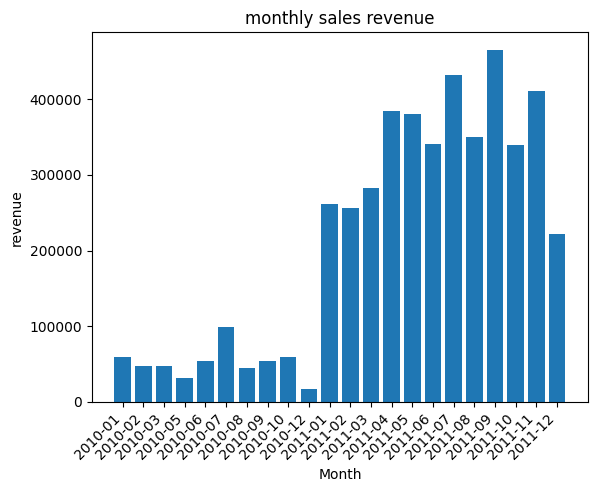

In [13]:
plt.bar(monthly_sales.index.astype(str),monthly_sales,label='revenue')
plt.title('monthly sales revenue')
plt.xlabel('Month')
plt.ylabel('revenue')
plt.xticks(rotation=45,ha='right')
plt.show()

Deep Analysis(RFM segementation)

In [14]:
snapshot_date=data['InvoiceDate'].max() + pd.Timedelta(days=1)
rfm=data[data['CustomerID'].notnull()].groupby('CustomerID').agg({
  'InvoiceDate':lambda x:(snapshot_date-x.max()).days,
  'InvoiceNo':'nunique',
  'Total price': 'sum'
})
rfm.columns=['Recency','Frequency','Monetory']

Return Analysis

<Axes: title={'center': 'Most Returned Products'}, ylabel='Description'>

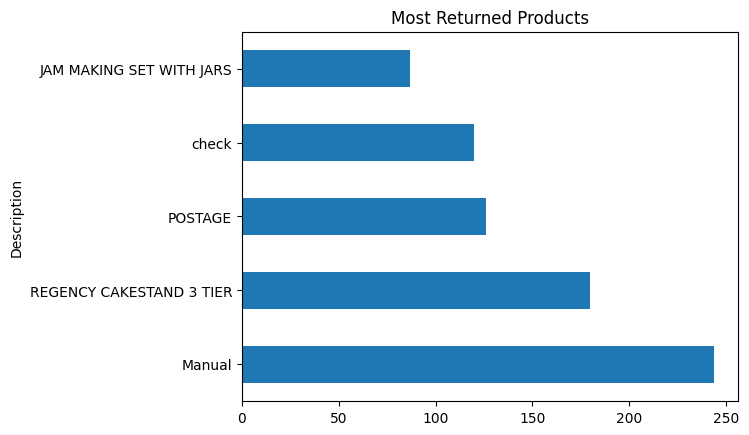

In [15]:
returns=data[data['Quantity']<0 ]
top_returns=returns['Description'].value_counts().head()
top_returns.plot(kind='barh', title='Most Returned Products')